In [6]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize

In [7]:
def calculate_angle(dir1, dir2):
    norm_dir1 = np.sqrt(dir1[0]**2 + dir1[1]**2)
    norm_dir2 = np.sqrt(dir2[0]**2 + dir2[1]**2)
    angle_in_radians = np.arccos(np.dot(dir1, dir2) / (norm_dir1 * norm_dir2))
    print(np.degrees(angle_in_radians))

In [8]:
def plot_vectors(ax: plt.Axes, pos1, dir1, color):
    ax.quiver(*pos1, *dir1, color=color, angles='xy', scale_units='xy', scale=1)

def plot_inf_line(ax: plt.Axes, pos: np.array, dir: np.array):
    slope = dir[1] / dir[0]
    intercept = pos[1] - slope * pos[0]
    x_values = np.linspace(-10, 10, 20)
    y_values = slope * x_values + intercept
    ax.plot(x_values, y_values, color='y', linestyle='--')

def point_on_line(cpa1, pos, dir):
    slope = dir[1] / dir[0]
    intercept = pos[1] - slope * pos[0]
    return np.isclose(cpa1[1], slope * cpa1[0] + intercept)

def find_intersection_geo(pos1, dir1, pos2, dir2):
    try:
        slope1 = dir1[1] / dir1[0]
        slope2 = dir2[1] / dir2[0]
        intercept1 = pos1[1] - slope1 * pos1[0]
        intercept2 = pos2[1] - slope2 * pos2[0]
        x = (intercept2 - intercept1) / (slope1 - slope2)
        y = slope1 * x + intercept1
        return np.array([x, y])
    except ZeroDivisionError:
        print("Lines are parallel!")

# distance between two points in 2D that belong to two lines
def objective_function(t, pos1, dir1, pos2, dir2):
    return (dir2[0] * t[1] + pos2[0] - (dir1[0] * t[0] + pos1[0]))**2 + (dir2[1] * t[1] + pos2[1] - (dir1[1] * t[0] + pos1[1]))**2

# Define the constraints
def constraint_ul(t, component, upper_limit):
    return upper_limit - t[component]

def constraint_ll(t, component, lower_limit):
    return t[component] - lower_limit

def find_dca_ana(pos1, dir1, pos2, dir2):
    t0 = [0, 0]
    constraints = [{'type': 'ineq', 'fun': constraint_ul, 'args': (0, 0)},
                   {'type': 'ineq', 'fun': constraint_ul, 'args': (1, 0)}]
    result = minimize(objective_function, t0, args=(pos1, dir1, pos2, dir2), constraints=constraints)
    print(result.x[1])
    dca = np.sqrt(objective_function(result.x, pos1, dir1, pos2, dir2))
    cpa1 = dir1 * result.x[0] + pos1
    cpa2 = dir2 * result.x[1] + pos2

    return dca, cpa1, cpa2

def plot_line_and_middle(ax: plt.Axes, point1, point2, color):
    middle = (point1 + point2) / 2.
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color, linestyle='--')
    ax.plot([middle[0]], [middle[1]], marker='o', color=color)

def generate_random_vector():
    rnd = np.random.uniform(-2, 2, 2)
    while (abs(rnd[0]) < 0.5 or abs(rnd[1]) < 0.5):
        rnd = np.random.uniform(-1, 2, 2)
    return rnd

In [9]:
def full_example(id, pos1, dir1, pos2, dir2):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_xlabel('x', loc='right')
    ax.set_ylabel('y', loc='top')
    ax.grid(True)
    ax.set_aspect('equal')

    # plot the origin
    ax.plot(0, 0, color='orange', marker='o')

    # plot the two lines
    plot_inf_line(ax, pos1, dir1)
    plot_inf_line(ax, pos2, dir2)

    # plot the two vectors
    plot_vectors(ax, pos1, dir1, 'b')
    plot_vectors(ax, pos2, dir2, 'r')

    # find the intersection of the two lines and plot it
    t = find_intersection_geo(pos1, dir1, pos2, dir2)
    ax.plot(t[0], t[1], color='g', marker='o')

    # find the intersection of the two lines and plot it
    dca, cpa1, cpa2 = find_dca_ana(pos1, dir1, pos2, dir2)
    ax.plot(cpa1[0], cpa1[1], color='cyan', marker='o')
    ax.plot(cpa2[0], cpa2[1], color='cyan', marker='o')
    print(f"dca: {dca}, cpa1: {cpa1}, cpa2: {cpa2}")

    plot_line_and_middle(ax, cpa1, cpa2, 'magenta')

    textstr = f"{id}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

-0.4999999999999334
dca: 2.121320343559674, cpa1: [1. 1.], cpa2: [2.5 2.5]


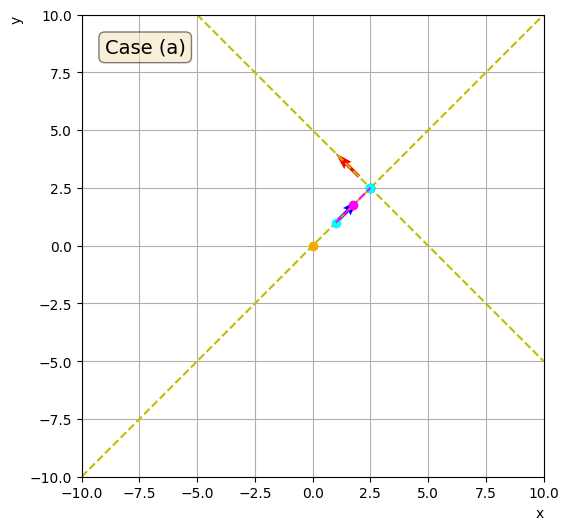

In [10]:
# Case (a): Two vectors pointing outwards the origin
# (improbable to happen in 3D)
pos1_a = np.array([1, 1])
dir1_a = np.array([1, 1])

pos2_a = np.array([2, 3])
dir2_a = np.array([-1, 1])

full_example("Case (a)", pos1_a, dir1_a, pos2_a, dir2_a)

-0.7500000416766861
dca: 0.7071067811865478, cpa1: [0.99999993 0.99999993], cpa2: [0.49999992 1.49999992]


/tmp/ipykernel_460567/3566286363.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  x = (intercept2 - intercept1) / (slope1 - slope2)


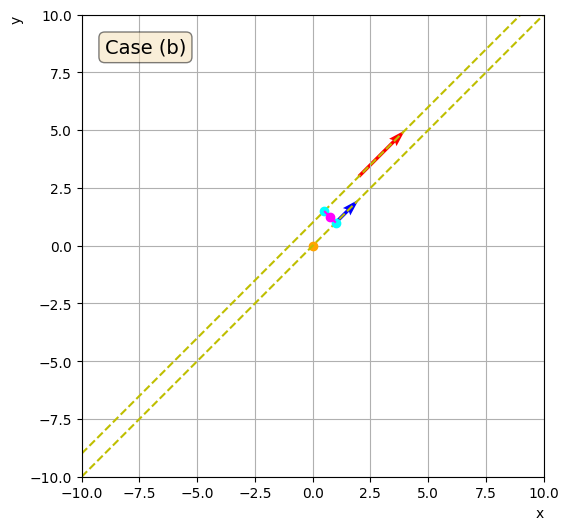

In [12]:
# Case (b): Two parallel vectors
pos1_b = np.array([1, 1])
dir1_b = np.array([1, 1])

pos2_b = np.array([2, 3])
dir2_b = np.array([2, 2])

full_example("Case (b)", pos1_b, dir1_b, pos2_b, dir2_b)

-1.0000000059604646
dca: 1.33279920316895e-08, cpa1: [1. 1.], cpa2: [0.99999999 0.99999999]


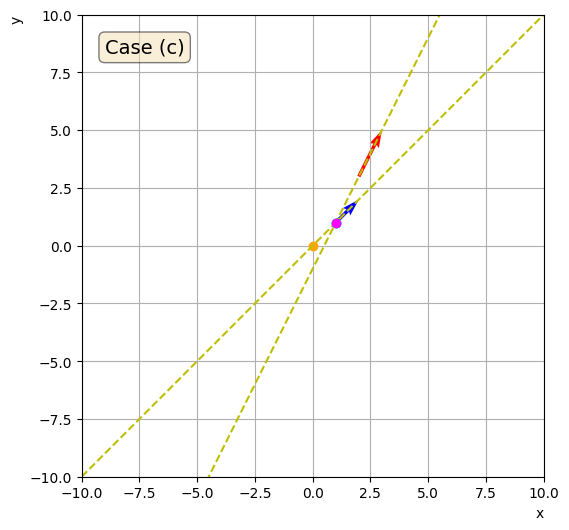

In [13]:
# Case (c): Two vectors intersect before their original positions
pos1_c = np.array([1, 1])
dir1_c = np.array([1, 1])

pos2_c = np.array([2, 3])
dir2_c = np.array([1, 2])

full_example("Case (c)", pos1_c, dir1_c, pos2_c, dir2_c)

-0.8000000059604645
dca: 1.341640786499878, cpa1: [1. 1.], cpa2: [0.39999999 2.19999999]


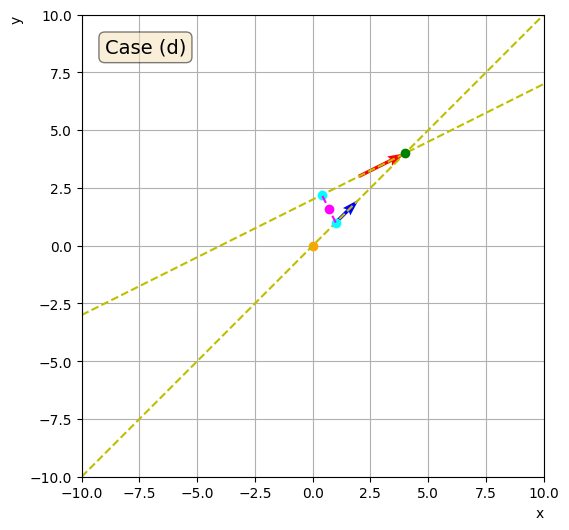

In [14]:
# Case (d): Two vectors intersect before their original positions
pos1_d = np.array([1, 1])
dir1_d = np.array([1, 1])

pos2_d = np.array([2, 3])
dir2_d = np.array([2, 1])

full_example("Case (d)", pos1_d, dir1_d, pos2_d, dir2_d)

In [ ]:
# Test with random vectors
for i in range(10):

    pos1 = generate_random_vector()
    dir1 = generate_random_vector()
    pos2 = generate_random_vector()
    dir2 = generate_random_vector()

    full_example(i, pos1, dir1, pos2, dir2)